# Applied Data Capstone project

## Table of contents
* [Introduction Business Problem](#introduction)
* [Data](#data)
* [Analysis](#analysis)
* [Conclusion](#conclusion)

## Introduction

Brussels is one of diverse cities in the Europe. There are many internationals people living and working in European institutions. When people are moving to Brussels it they often having a questions where to live in Brussels. Obviously, each person might have specific criteria to choose a place of living in Brussels. Some people, prefer to live closer to work, another might prefer to live close to shopping center or close to restaurants or close to tram station in order to easily commute to work. Basically, it can be interesting to read about neighborhoods of Brussels and have some idea about the neighborhood before moving to Brussels. In this report only one neighborhood of Brussels namely Anderlecht will be analyzed based on Foursquare data. Moreover, k-means clustering will be applied to see which neighborhood are in the same cluster and what is their relationship.

# Data
In order to analyze the neighborhood data of Anderlecht firstly we need to now the neighborhoods of Anderlecht. This part of Brussels have 5 neighborhoods Veeweyde, La Roue, Vogelenzang, Scherdemael and Quartier des Trefles. Initially, geographical location of this neighborhood have been gathered from google maps. Based on geographical location venues for each neighborhood have pulled from foursquare. As a result data table have been built for the neighborhoods. Data 
includes name of neighborhood, name of venue and geographical location and category of venue.

## Import required libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

## Load the neighborhood data of Anderlecht

In [2]:
data = {'Neighborhood':  ['Veeweyde', 'La Roue', 'Vogelenzang', 'Scherdemael','Quartier des Trefles' ],
        'Latitude': ['50.8294786','50.8211173','50.816111','50.8310778', '50.824371'],
        'Longitude':['4.3006508','4.2939154','4.276944', '4.2894119','4.288487']
        }

Anderlecht_data = pd.DataFrame(data, columns = ['Neighborhood','Latitude','Longitude'],dtype=float)
Anderlecht_data
Anderlecht_data.dtypes
Anderlecht_data['Neighborhood'].astype(str)
Anderlecht_data



,Neighborhood,Latitude,Longitude
0,Veeweyde,50.829479,4.300651
1,La Roue,50.821117,4.293915
2,Vogelenzang,50.816111,4.276944
3,Scherdemael,50.831078,4.289412
4,Quartier des Trefles,50.824371,4.288487


In [3]:
#import pandas as pd
#data = pd.read_excel (r'/resources/labs/DP0701EN/Anderlecht_neigboorhood.xlsx') 
#df = pd.DataFrame(data, columns= ['Neighborhood','Latitude', 'Longitude'])
#df

<a id='item1'></a>

## Explore Dataset

Let's get the geographical coordinates of Anderelecht.

In [4]:
address = 'Anderlecht'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Anderlecht are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Anderlecht are 50.8390983, 4.3296526.


In [5]:

# create map of Anderlecht using latitude and longitude values
map_Anderlecht = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Anderlecht_data['Latitude'], Anderlecht_data['Longitude'], Anderlecht_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Anderlecht)  
    
map_Anderlecht

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [6]:
CLIENT_ID = 'UMV1JBHPGAO5GWW2X1BEIACWSJ0HZEF0Q0TBJCF322RKLYJW' # your Foursquare ID
CLIENT_SECRET = '4AJDQVOE1IG3LWSTQJLSLW54SRXVFMDUDPFAZBWDNURWUA2W' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UMV1JBHPGAO5GWW2X1BEIACWSJ0HZEF0Q0TBJCF322RKLYJW
CLIENT_SECRET:4AJDQVOE1IG3LWSTQJLSLW54SRXVFMDUDPFAZBWDNURWUA2W


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's latitude and longitude values.

In [7]:
neighborhood_latitude = Anderlecht_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Anderlecht_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Anderlecht_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Veeweyde are 50.8294786, 4.3006508.


#### Now, let's get the top 100 venues that are in Veeweyde within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [8]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=UMV1JBHPGAO5GWW2X1BEIACWSJ0HZEF0Q0TBJCF322RKLYJW&client_secret=4AJDQVOE1IG3LWSTQJLSLW54SRXVFMDUDPFAZBWDNURWUA2W&v=20180605&ll=50.8294786,4.3006508&radius=500&limit=100'

Send the GET request and examine the resutls

In [9]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f576849fa0ba4415188afd8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Anderlecht',
  'headerFullLocation': 'Anderlecht, Brussels',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 50.833978604500004,
    'lng': 4.307761923350391},
   'sw': {'lat': 50.8249785955, 'lng': 4.293539676649608}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e78cdb07d8b90e4423fb041',
       'name': 'Colruyt',
       'location': {'address': 'Rue Félix De Cuyperstraat 42',
        'lat': 50.82731999522965,
        'lng': 4.302584397470871,
        'labeledLatLngs': [{'label': 'display',
          'lat': 50.

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [11]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Colruyt,Supermarket,50.827320,4.302584
1,André Destiné,Sandwich Place,50.828041,4.305459
2,Saint-Guidon,French Restaurant,50.833370,4.298189
3,Parc Astrid / Astridpark (Astridpark),Park,50.832871,4.298143
4,Basic-Fit,Gym / Fitness Center,50.828529,4.305061


And how many venues were returned by Foursquare?

In [12]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

23 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in Anderlecht

#### Let's create a function to repeat the same process to all the neighborhoods in Anderlecht

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *Anderlecht_venues*.

In [14]:
# type your answer here

Anderlecht_venues = getNearbyVenues(names=Anderlecht_data['Neighborhood'],
                                   latitudes=Anderlecht_data['Latitude'],
                                   longitudes=Anderlecht_data['Longitude']
                                  )



Veeweyde
La Roue
Vogelenzang
Scherdemael
Quartier des Trefles


#### Let's check the size of the resulting dataframe

In [15]:
print(Anderlecht_venues.shape)
Anderlecht_venues.head()

(81, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Veeweyde,50.829479,4.300651,Colruyt,50.827320,4.302584,Supermarket
1,Veeweyde,50.829479,4.300651,André Destiné,50.828041,4.305459,Sandwich Place
2,Veeweyde,50.829479,4.300651,Saint-Guidon,50.833370,4.298189,French Restaurant
3,Veeweyde,50.829479,4.300651,Parc Astrid / Astridpark (Astridpark),50.832871,4.298143,Park
4,Veeweyde,50.829479,4.300651,Basic-Fit,50.828529,4.305061,Gym / Fitness Center


Let's check how many venues were returned for each neighborhood

Text(0.5, 1.0, 'Count of venues per neighborhood')

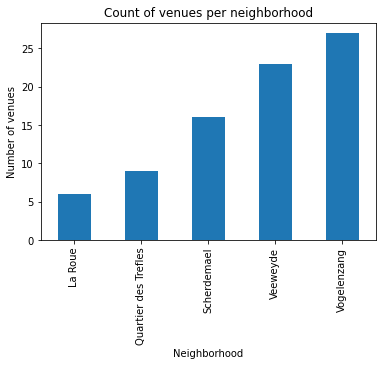

In [57]:
import matplotlib.pyplot as plt
Anderlecht_venues.groupby('Neighborhood').count()
df=Anderlecht_venues.groupby('Neighborhood').count()
df2=df['Venue']
df2.plot(kind='bar')
plt.ylabel('Number of venues')
plt.title('Count of venues per neighborhood')

#### Let's find out how many unique categories can be curated from all the returned venues

In [17]:
print('There are {} uniques categories.'.format(len(Anderlecht_venues['Venue Category'].unique())))

There are 47 uniques categories.


<a id='item3'></a>

## 3. Analyze Each Neighborhood

Text(0.5, 0, 'Venue')

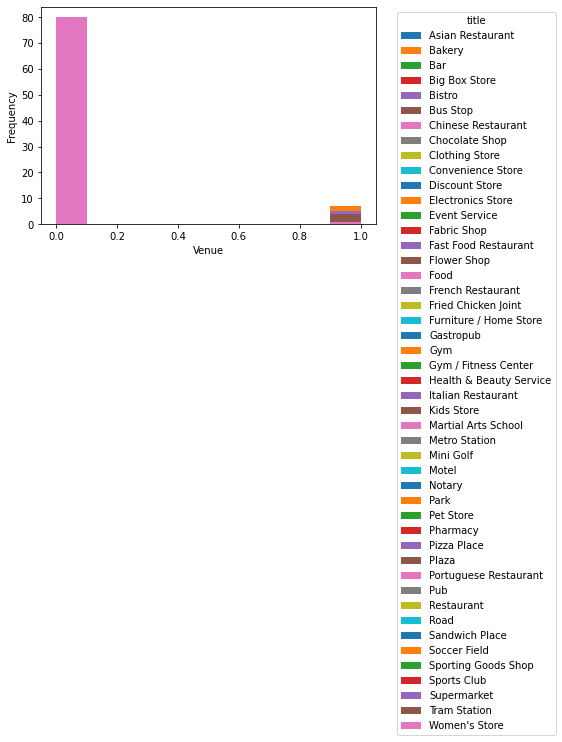

In [67]:
# one hot encoding
Anderlecht_onehot = pd.get_dummies(Anderlecht_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Anderlecht_onehot['Neighborhood'] = Anderlecht_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Anderlecht_onehot.columns[-1]] + list(Anderlecht_onehot.columns[:-1])
Anderlecht_onehot = Anderlecht_onehot[fixed_columns]

Anderlecht_onehot.head()
Anderlecht_onehot.plot(kind='hist')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Venue')

And let's examine the new dataframe size.

In [19]:
Anderlecht_onehot.shape

(81, 48)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

Text(0.5, 0, 'Venue')

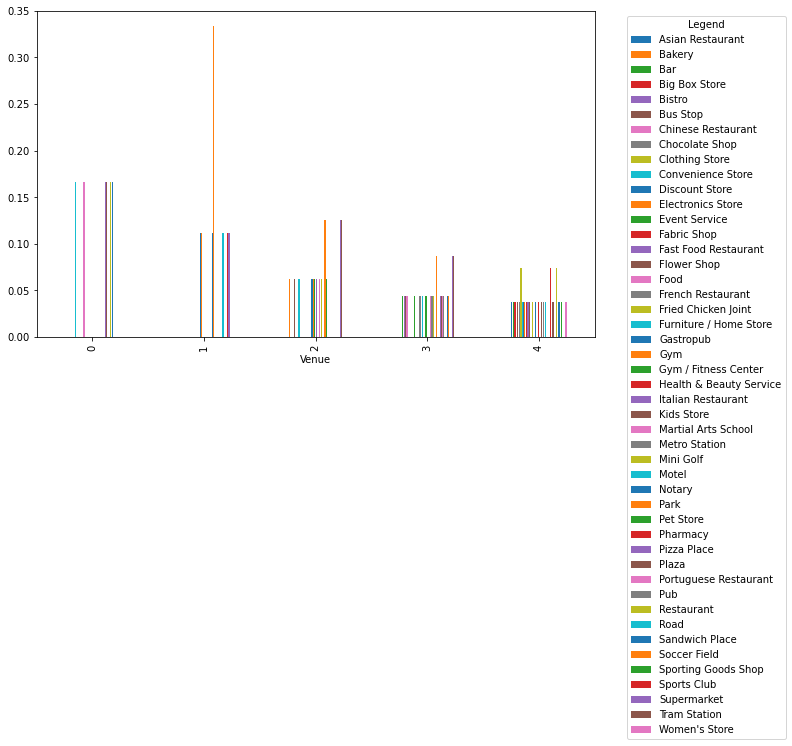

In [68]:
Anderlecht_grouped = Anderlecht_onehot.groupby('Neighborhood').mean().reset_index()
Anderlecht_grouped.plot(kind='bar', figsize=(10,6))
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Venue')

#### Let's confirm the new size

In [69]:
Anderlecht_grouped.shape

(5, 48)

#### Let's print each neighborhood along with the top 5 most common venues

In [70]:
num_top_venues = 3

for hood in Anderlecht_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Anderlecht_grouped[Anderlecht_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----La Roue----
               venue  freq
0        Pizza Place  0.17
1     Sandwich Place  0.17
2  Convenience Store  0.17


----Quartier des Trefles----
         venue  freq
0         Park  0.33
1  Supermarket  0.11
2  Sports Club  0.11


----Scherdemael----
          venue  freq
0  Tram Station  0.12
1   Supermarket  0.12
2          Park  0.12


----Veeweyde----
          venue  freq
0  Tram Station  0.09
1   Supermarket  0.09
2          Park  0.09


----Vogelenzang----
            venue  freq
0      Restaurant  0.07
1        Pharmacy  0.07
2  Clothing Store  0.07




#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [72]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Anderlecht_grouped['Neighborhood']

for ind in np.arange(Anderlecht_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Anderlecht_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,La Roue,Pizza Place,Convenience Store,Food,Sandwich Place,Restaurant
1,Quartier des Trefles,Park,Gastropub,Supermarket,Sports Club,Gym
2,Scherdemael,Supermarket,Tram Station,Park,Pet Store,Bakery
3,Veeweyde,Park,Tram Station,Supermarket,Martial Arts School,Metro Station
4,Vogelenzang,Pharmacy,Clothing Store,Restaurant,Women's Store,Electronics Store


<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [42]:
# set number of clusters
kclusters = 3

Anderlecht_grouped_clustering = Anderlecht_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Anderlecht_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [43]:
# add clustering labels
#del neighborhoods_venues_sorted
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Anderlecht_merged = Anderlecht_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Anderlecht_merged = Anderlecht_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Anderlecht_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Veeweyde,50.829479,4.300651,1,Park,Tram Station,Supermarket,Martial Arts School,Metro Station
1,La Roue,50.821117,4.293915,0,Pizza Place,Convenience Store,Food,Sandwich Place,Restaurant
2,Vogelenzang,50.816111,4.276944,1,Pharmacy,Clothing Store,Restaurant,Women's Store,Electronics Store
3,Scherdemael,50.831078,4.289412,1,Supermarket,Tram Station,Park,Pet Store,Bakery
4,Quartier des Trefles,50.824371,4.288487,2,Park,Gastropub,Supermarket,Sports Club,Gym


Finally, let's visualize the resulting clusters

In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Anderlecht_merged['Latitude'], Anderlecht_merged['Longitude'], Anderlecht_merged['Neighborhood'], Anderlecht_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [45]:
Anderlecht_merged.loc[Anderlecht_merged['Cluster Labels'] == 0, Anderlecht_merged.columns[[1] + list(range(5, Anderlecht_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,50.821117,Convenience Store,Food,Sandwich Place,Restaurant


#### Cluster 2

In [46]:
Anderlecht_merged.loc[Anderlecht_merged['Cluster Labels'] == 1, Anderlecht_merged.columns[[1] + list(range(5, Anderlecht_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,50.829479,Tram Station,Supermarket,Martial Arts School,Metro Station
2,50.816111,Clothing Store,Restaurant,Women's Store,Electronics Store
3,50.831078,Tram Station,Park,Pet Store,Bakery


#### Cluster 3

In [47]:
Anderlecht_merged.loc[Anderlecht_merged['Cluster Labels'] == 2, Anderlecht_merged.columns[[1] + list(range(5, Anderlecht_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,50.824371,Gastropub,Supermarket,Sports Club,Gym


#### Cluster 4

In [48]:
Anderlecht_merged.loc[Anderlecht_merged['Cluster Labels'] == 3, Anderlecht_merged.columns[[1] + list(range(5, Anderlecht_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue


#### Cluster 5

In [49]:
Anderlecht_merged.loc[Anderlecht_merged['Cluster Labels'] == 4, Anderlecht_merged.columns[[1] + list(range(5, Anderlecht_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue


# Conclusion
Neighborhood data of Anderlecht have been analyzed in this report. It is been observed that there many diverse venues in Anderlecht. Choose 
a neighborhood in Anderlecht can be specific to the individual. There are more venues in Veeweyde. If person is more into restaurants then he/she have to go to La Raue. Adversely, if the person is looking for more sport clubs then he/she has choose
Quartier des Trefles as a living place. One thing that we need to consider is that conclusion is based on data from foursquare. This data is collected based on inputs of user. That is why correctness of the data can be questioned.